In [1]:
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
def get_response_json(url):
    r = requests.get(url)
    print(r)     #Successful = 'Response 200'
    return r.json()

In [4]:
def save_json(name, url):
    response = get_response_json(url)
    
    name += '.json'
    with open(name,'w') as file:
        json.dump(response, file)
    print(name, 'was saved.')

In [5]:
def load_json(name):
    name += '.json'
    with open(name) as file:
        data = json.load(file)

    print(data.keys())
    return data

In [6]:
name1 = 'freeapi1'
url1 = 'https://api.publicapis.org/entries'
save_json(name1, url1)

<Response [200]>
freeapi1.json was saved.


In [7]:
data1 = load_json(name1)

dict_keys(['count', 'entries'])


In [8]:
df1 = pd.DataFrame(data1['entries'])
df1

,API,Description,Auth,HTTPS,Cors,Link,Category
0,Axolotl,Collection of axolotl pictures and facts,,True,unknown,https://theaxolotlapi.netlify.app/,Animals
1,Cat Facts,Daily cat facts,,True,no,https://alexwohlbruck.github.io/cat-facts/,Animals
2,Cataas,Cat as a service (cats pictures and gifs),,True,unknown,https://cataas.com/,Animals
3,catAPI,Random pictures of cats,,True,yes,https://github.com/ThatCopy/catAPI/wiki/Usage,Animals
4,Cats,Pictures of cats from Tumblr,apiKey,True,unknown,https://docs.thecatapi.com/,Animals
...,...,...,...,...,...,...,...
935,Troposphere,Global weather and climate data,apiKey,True,yes,https://www.troposphere.io/developer,Weather
936,Visual Crossing,Global historical and weather forecast data,apiKey,True,yes,https://www.visualcrossing.com/weather-api,Weather
937,weather-api,A RESTful free API to check the weather,,True,no,https://github.com/robertoduessmann/weather-api,Weather
938,Weatherbit,Weather,apiKey,True,unknown,https://www.weatherbit.io/api,Weather


In [17]:
df1.dtypes

API            object
Description    object
Auth           object
HTTPS            bool
Cors           object
Link           object
Category       object
dtype: object

In [25]:
df1.describe()

,API,Description,Auth,HTTPS,Cors,Link,Category
count,940,940,940,940,940,940,940
unique,929,898,5,2,3,940,47
top,Transport for The Netherlands,Music,,True,unknown,https://theaxolotlapi.netlify.app/,Development
freq,2,8,462,852,637,1,82


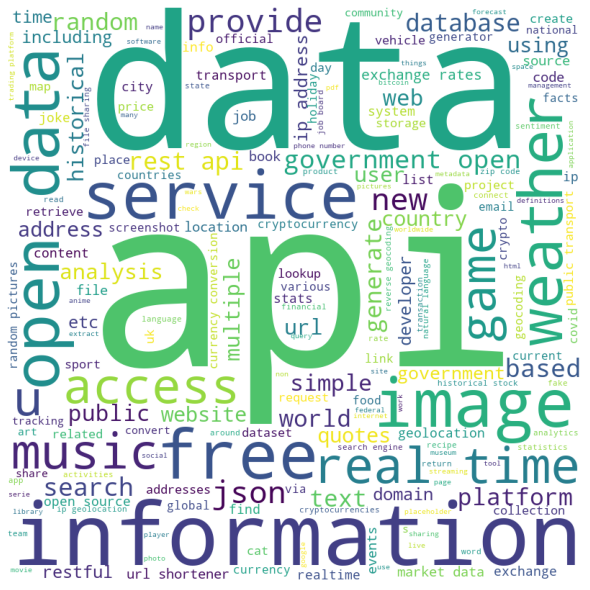

In [36]:
from wordcloud import WordCloud, STOPWORDS

comment_words = ''
stopwords = set(STOPWORDS)
 
for val in df1.Description:
    val = str(val)
    tokens = val.split()

    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                      background_color ='white',
                      stopwords = stopwords,
                      min_font_size = 10).generate(comment_words)

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

In [37]:
name2 = 'freeapi2'
url2 = 'https://api.coindesk.com/v1/bpi/currentprice.json'
save_json(name2, url2)

data2 = load_json(name2)

<Response [200]>
freeapi2.json was saved.
dict_keys(['time', 'disclaimer', 'chartName', 'bpi'])


In [38]:
df2 = pd.DataFrame(data2['bpi'])
df2

,USD,GBP,EUR
code,USD,GBP,EUR
symbol,&#36;,&pound;,&euro;
rate,"47,292.9533","34,418.6764","40,332.0454"
description,United States Dollar,British Pound Sterling,Euro
rate_float,47292.9533,34418.6764,40332.0454


In [39]:
df2 = df2.transpose()
df2

,code,symbol,rate,description,rate_float
USD,USD,&#36;,"47,292.9533",United States Dollar,47292.9533
GBP,GBP,&pound;,"34,418.6764",British Pound Sterling,34418.6764
EUR,EUR,&euro;,"40,332.0454",Euro,40332.0454


In [40]:
df2 = df2.drop('code', axis=1)
df2

,symbol,rate,description,rate_float
USD,&#36;,"47,292.9533",United States Dollar,47292.9533
GBP,&pound;,"34,418.6764",British Pound Sterling,34418.6764
EUR,&euro;,"40,332.0454",Euro,40332.0454


<function matplotlib.pyplot.show(close=None, block=None)>

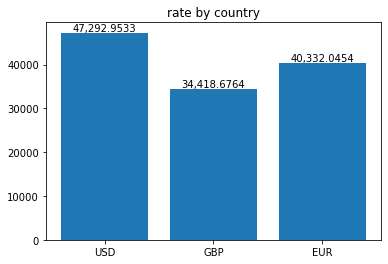

In [41]:
plt.bar(list(df2.index),df2.rate_float)
plt.title('rate by country')
for i in range(len(df2)):
    plt.annotate(df2.rate[i], xy=(list(df2.index)[i],df2.rate_float[i]), ha='center', va='bottom')
plt.show

In [42]:
name3 = 'freeapi3'
url3 = 'https://datausa.io/api/data?drilldowns=Nation&measures=Population'
save_json(name3, url3)

data3 = load_json(name3)

<Response [200]>
freeapi3.json was saved.
dict_keys(['data', 'source'])


In [43]:
df3 = pd.DataFrame(data3['data'])
df3

,ID Nation,Nation,ID Year,Year,Population,Slug Nation
0,01000US,United States,2019,2019,328239523,united-states
1,01000US,United States,2018,2018,327167439,united-states
2,01000US,United States,2017,2017,325719178,united-states
3,01000US,United States,2016,2016,323127515,united-states
4,01000US,United States,2015,2015,321418821,united-states
5,01000US,United States,2014,2014,318857056,united-states
6,01000US,United States,2013,2013,316128839,united-states


In [44]:
df3 = df3.drop(df3.columns[2], axis=1)
df3

,ID Nation,Nation,Year,Population,Slug Nation
0,01000US,United States,2019,328239523,united-states
1,01000US,United States,2018,327167439,united-states
2,01000US,United States,2017,325719178,united-states
3,01000US,United States,2016,323127515,united-states
4,01000US,United States,2015,321418821,united-states
5,01000US,United States,2014,318857056,united-states
6,01000US,United States,2013,316128839,united-states


In [45]:
df3 = df3.reindex(df3.index[::-1])
df3

,ID Nation,Nation,Year,Population,Slug Nation
6,01000US,United States,2013,316128839,united-states
5,01000US,United States,2014,318857056,united-states
4,01000US,United States,2015,321418821,united-states
3,01000US,United States,2016,323127515,united-states
2,01000US,United States,2017,325719178,united-states
1,01000US,United States,2018,327167439,united-states
0,01000US,United States,2019,328239523,united-states


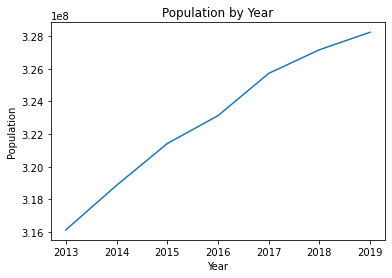

In [46]:
x = df3.Year
y = df3.Population
plt.plot(x, y)
plt.title('Population by Year')
plt.xlabel('Year')
plt.ylabel('Population')
plt.show()

In [47]:
name4 = 'freeapi4'
url4 = 'https://www.7timer.info/bin/astro.php?lon=113.2&lat=23.1&ac=0&unit=metric&output=json&tzshift=0'
save_json(name4, url4)

data4 = load_json(name4)

<Response [200]>
freeapi4.json was saved.
dict_keys(['product', 'init', 'dataseries'])


In [48]:
df4 = pd.DataFrame(data4['dataseries'])
df4

,timepoint,cloudcover,seeing,transparency,lifted_index,rh2m,wind10m,temp2m,prec_type
0,3,8,6,3,-4,6,"{'direction': 'SW', 'speed': 2}",33,rain
1,6,8,7,4,-4,9,"{'direction': 'S', 'speed': 3}",31,rain
2,9,3,7,5,-4,11,"{'direction': 'S', 'speed': 2}",29,rain
3,12,5,8,5,-6,13,"{'direction': 'S', 'speed': 2}",27,rain
4,15,9,8,5,-6,12,"{'direction': 'E', 'speed': 2}",27,rain
5,18,9,6,5,-6,11,"{'direction': 'E', 'speed': 2}",28,rain
6,21,9,6,4,-6,8,"{'direction': 'SE', 'speed': 2}",32,rain
7,24,8,6,3,-6,6,"{'direction': 'W', 'speed': 2}",34,rain
8,27,9,6,3,-6,7,"{'direction': 'W', 'speed': 2}",33,rain
9,30,6,7,4,-6,9,"{'direction': 'S', 'speed': 2}",31,rain


In [49]:
df4_sub = df4['wind10m'].apply(pd.Series)
df4_sub.head()

,direction,speed
0,SW,2
1,S,3
2,S,2
3,S,2
4,E,2


In [50]:
df4 = pd.concat([df4,df4_sub],axis=1)
df4.head()

,timepoint,cloudcover,seeing,transparency,lifted_index,rh2m,wind10m,temp2m,prec_type,direction,speed
0,3,8,6,3,-4,6,"{'direction': 'SW', 'speed': 2}",33,rain,SW,2
1,6,8,7,4,-4,9,"{'direction': 'S', 'speed': 3}",31,rain,S,3
2,9,3,7,5,-4,11,"{'direction': 'S', 'speed': 2}",29,rain,S,2
3,12,5,8,5,-6,13,"{'direction': 'S', 'speed': 2}",27,rain,S,2
4,15,9,8,5,-6,12,"{'direction': 'E', 'speed': 2}",27,rain,E,2


In [51]:
df4 = df4.drop('wind10m', axis=1)
df4.head()

,timepoint,cloudcover,seeing,transparency,lifted_index,rh2m,temp2m,prec_type,direction,speed
0,3,8,6,3,-4,6,33,rain,SW,2
1,6,8,7,4,-4,9,31,rain,S,3
2,9,3,7,5,-4,11,29,rain,S,2
3,12,5,8,5,-6,13,27,rain,S,2
4,15,9,8,5,-6,12,27,rain,E,2


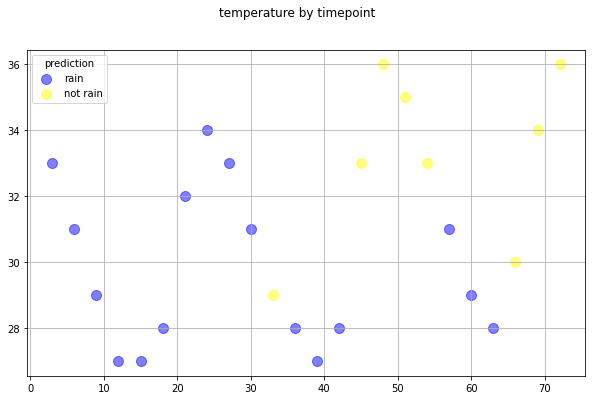

In [52]:
x_rain = df4[df4.prec_type=='rain'].timepoint
y_rain = df4[df4.prec_type=='rain'].temp2m
x_none = df4[df4.prec_type=='none'].timepoint
y_none = df4[df4.prec_type=='none'].temp2m

fig, ax = plt.subplots(1, figsize=(10, 6))
fig.suptitle('temperature by timepoint')

ax.scatter(x_rain, y_rain, color="blue", s=100, alpha=0.5, linewidths=1, label='rain')
ax.scatter(x_none, y_none, color="yellow", s=100, alpha=0.5, linewidths=1, label='not rain')
ax.legend(title='prediction')
ax.grid(True)

plt.show()

In [53]:
name5 = 'freeapi5'
url5 ='https://freegeoip.app/json/'
save_json(name5, url5)

data5 = load_json(name5)

<Response [200]>
freeapi5.json was saved.
dict_keys(['ip', 'country_code', 'country_name', 'region_code', 'region_name', 'city', 'zip_code', 'time_zone', 'latitude', 'longitude', 'metro_code'])


In [54]:
df5 = pd.DataFrame(pd.Series(data5)).transpose()
df5

,ip,country_code,country_name,region_code,region_name,city,zip_code,time_zone,latitude,longitude,metro_code
0,2405:9800:b520:6b4f:f11c:b987:334d:19ec,TH,Thailand,73,Nakhon Pathom,Nakhon Pathom,73000,Asia/Bangkok,13.8667,100.1917,0


In [55]:
import folium

visual5 = folium.Map(
    location=[df5.latitude, df5.longitude],
    zoom_start=10,
)

folium.Marker(
    location=[df5.latitude, df5.longitude],
    popup=df5.city,
    icon=folium.Icon(icon='cloud')
).add_to(visual5)

visual5